# Soil water retention modelling 
## M. Vanclooster (UCL/AGRO/ELI: 20/02/2017)

In this $\textit{Jupyter notebook}$, we model the soil water retention function, which is one of the basic soil specific hydraulic properties that we need to model before we can solve the water flow equation. We use the $\textit{Jupyter notebook}$ environment in this course, because it is an interesting environment allowing to combine calculation code objects, with figures and text explanations objects. In addition, it can be easily exported in a web based environment. You should have a $\textit{Python}$ environment which allows running $\textit{Jupyter notebooks}$. 

We first start by initialising the $\textit{Python}$ programming environment.

In [1]:
# Miscellaneous operating system interfaces
import os
# Python Data Analysis library
import pandas as pd
# Python Numerical computating library
import numpy as np
# Python Scientifical computing library
import scipy as sc
# Python plotting library
from matplotlib import pyplot as plt

# Allowing plot inside the notebook
%matplotlib inline

You should also specify the working directory in which you are going to work. This should be adapted to your working directory. 


In [2]:
# Getting current directory
#cdir = 'C:/Users/vanclooster/Hubic/Documents/2018/Documents2018/cours/Hydrodynamiques des sols/Support Python'

The soil moisture retention curve relates volumetric soil moisture with the soil water suction head (a measure of the potential energy associated with the water particle in the soil, expressed as an energy by unit of weight, and hence expressed in pressure/suction units). As stated in the theoretical course, this relation is non linear and is soil type specific. Also, the soil water suction head changes with different order of magnitudes, and hence it is very convenient to use the logarithmic value of this pressure head (referred to as the pF value). 
Let's first define these pF values, and subsequently the corresponding suction head values. In soil physics, it is very usual to express suction head in equivalent heights of a water column expressed in cm.

In [3]:
# Independent variable definitions(pF and h (cm))
pf = np.arange(0, 7, 0.1)
h = 10**pf #cm!

Let's verify whether $\textit{Python}$ correctly understood what we have defined.  

In [4]:
pf,h

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9]),
 array([  1.00000000e+00,   1.25892541e+00,   1.58489319e+00,
          1.99526231e+00,   2.51188643e+00,   3.16227766e+00,
          3.98107171e+00,   5.01187234e+00,   6.30957344e+00,
          7.94328235e+00,   1.00000000e+01,   1.25892541e+01,
          1.58489319e+01,   1.99526231e+01,   2.51188643e+01,
          3.16227766e+01,   3.98107171e+01,   5.01187234e+01,
          6.30957344e+01,   7.94328235e+01,   1.00000000e+02,
          1.25892541e+02,   1.58489319e+02,   1.99526231e+02,
          2.51188643e+02, 

Great! The pF values  were correctly interpreted by $\textit{Python}$ and corresponding suction heads were calculated and stored in a new $\textit{Python}  array$. 
 
Now we have a set of values of h, let's calculate some corresponding values for the volumetric water content. We hereby use the parametric equation of van Genuchten  (cite van Genuchten, 1980). 

\begin{equation}
\theta(h) =\theta_{r} +\frac{\theta_{s}-\theta_{r}}{(1+(\alpha h)^n)^m}
\end{equation}

In this equation $\theta_{r}$ and $\theta_{s}$ are the saturated and residual water content. The parameters $m$ and $n$ are shape parameters. We can add the following additional constraint on these shape parameters:  $m=1-1/n$. Actually this latter mathematical constraint has been introduced to combine the retention model with a conceptual model of the hydraulic conductivity  (cite Mualem, 1976). If this constraint is applied, we can obtain a closed form analytical expression for the hydraulic conductivity. We come-back to this later.

The $\alpha$ parameter tends towards the inverse of the air value. If $h$ is expressed in (cm), then $\alpha$ is expressed in (1/cm). The product $\alpha h$ represents a relative pressure.

Let's specify these parameters for a given soil: 


In [5]:
# Specification of the soil moisture retention parameters of a given soil
thr = 0.01
ths = 0.4
alfa = 0.01
n = 1.1
m = 1-1/n

We now can calculate the corresponding soil water content values with the model: 

In [6]:
# Calculation of the soil volumetric water content
th = thr+(ths-thr)/(1+(alfa*h)**n)**(1-1/n)
    

Let's check the numerical values of this newly created variable


In [7]:
th

array([ 0.39977706,  0.39971309,  0.39963085,  0.39952522,  0.39938964,
        0.39921582,  0.39899325,  0.39870876,  0.39834592,  0.3978844 ,
        0.3972994 ,  0.39656108,  0.39563421,  0.39447829,  0.39304812,
        0.39129542,  0.38917129,  0.38662992,  0.38363292,  0.38015403,
        0.37618306,  0.37172829,  0.36681667,  0.36149149,  0.35580833,
        0.3498299 ,  0.34362097,  0.3372441 ,  0.33075657,  0.32420864,
        0.31764285,  0.31109415,  0.3045905 ,  0.29815379,  0.2918007 ,
        0.2855437 ,  0.27939181,  0.27335137,  0.26742655,  0.2616199 ,
        0.2559327 ,  0.25036526,  0.24491718,  0.23958751,  0.2343749 ,
        0.2292777 ,  0.22429407,  0.21942201,  0.21465944,  0.2100042 ,
        0.20545412,  0.20100699,  0.19666061,  0.19241282,  0.18826145,
        0.18420436,  0.18023948,  0.17636473,  0.17257808,  0.16887757,
        0.16526123,  0.16172718,  0.15827354,  0.15489849,  0.15160026,
        0.14837708,  0.14522726,  0.14214914,  0.13914108,  0.13

Apparently, some reasonable water content values are calculated. We'll check these calculations graphically.  

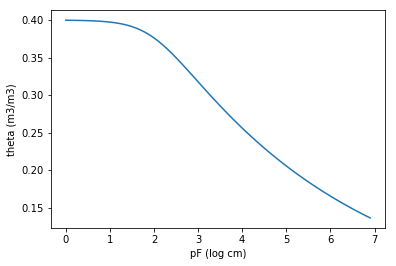

In [8]:
plt.plot(pf,th);
plt.xlabel('pF (log cm)')
plt.ylabel('theta (m3/m3)')

At least this looks as what we expect for a soil water retention curve: a nice sigmoid non linear curve that relates water content with pF values. For the fun, we'll look also to this curve in terms of h values: 

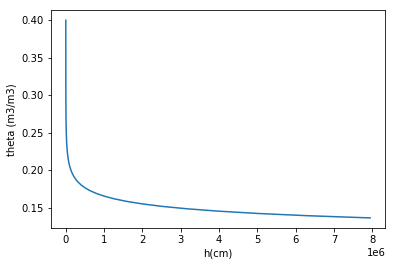

In [9]:
ax = plt.plot(h,th);
plt.xlabel('h(cm)')
plt.ylabel('theta (m3/m3)')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

In this representation, the air entry value close to saturation is no longer observable. So, in the next part of this notebook, we look to the retention curve in pF values.

We try now to evaluate the sensitivity of the parameters. A very simple way to evaluate the sensitivity of a parameter is the graphical sensitivity approach. We create different reasonable values of a parameter and evaluate how it impacts the modelling results. 

Let's start with analysing the sensitivity of $\theta_{s}$. We  create a set of plausible values of $\theta_{s}$.

In [10]:
ths_possible = np.arange(0.3, 0.5, 0.02)

In [11]:
ths_possible

array([ 0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48])

Subsequently, we calculate for each possible value of $\theta_{s}$ the soil moisture retention curve, keeping of course the other parameters fixed at their previous values. 
We need to create first an empty list in which we can put all the different retention curve values. We generate the different retention models for the different $\theta_{s}$ values using a $\textit{for loop}$ in $\textit{Python}$

In [12]:
th_sens=10*[0]
for i in range(0, 10):
    th_sens[i]=(thr+(ths_possible[i]-thr)/(1+(alfa*h)**n)**(1-1/n))


and we can make a nice plot of this. 

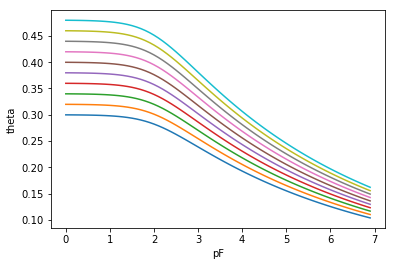

In [13]:
for i in range(0, 10):
    plt.plot(pf,th_sens[i]);
    plt.xlabel('pF')
    plt.ylabel('theta')

We observed that the $\theta_{s}$ scales the left hand size of the retention cuve to higher or lower values. 

We can use a similar procedure for analysing the sensitivity of all the other parameters. Let's start with $\theta_{r}$


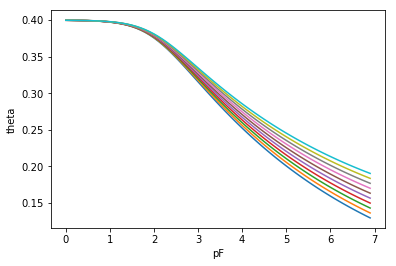

In [14]:
thr_possible = np.arange(0., 0.1, 0.01)
th_sens=10*[0]
for i in range(0, 10):
    th_sens[i]=(thr_possible[i]+(ths-thr_possible[i])/(1+(alfa*h)**n)**(1-1/n))
    plt.plot(pf,th_sens[i]);
    plt.xlabel('pF')
    plt.ylabel('theta')


We see, that $\theta_{r}$ mainly scales the right hand side of the retention curve. Let's look to the sensitivity of $\alpha$

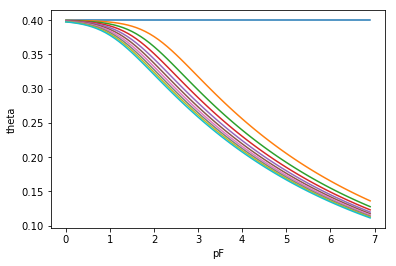

In [15]:
alf_possible = np.arange(0., 0.1, 0.01)
th_sens=10*[0]
for i in range(0, 10):
    th_sens[i]=(thr+(ths-thr)/(1+(alf_possible[i]*h)**n)**(1-1/n))
    plt.plot(pf,th_sens[i]);
    plt.xlabel('pF')
    plt.ylabel('theta')


Similarly for n (and consequently m). 

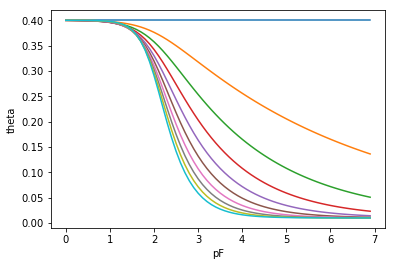

In [16]:
n_possible = np.arange(1.0, 2.2, 0.1)
th_sens=10*[0]
for i in range(0, 10):
    th_sens[i]=(thr+(ths-thr)/(1+(alfa*h)**n_possible[i])**(1-1/n_possible[i]))
    plt.plot(pf,th_sens[i]);
    plt.xlabel('pF')
    plt.ylabel('theta')


That's it for this first $\textit{Jupyter notebook}$ example. We've learned how we can code a simple function, how we can evaluate graphically the behaviour of this function and how we can assess the sensitivity of the parameters of this function. 

Let's go to the next notebook to proceed with other hydraulic functions.